In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [75]:
spy = yf.download('SPY', period='1wk', interval='1m')
if isinstance(spy.columns, pd.MultiIndex):
    spy.columns = spy.columns.get_level_values(0)
spy['Volume'].mean()
print(spy)

C:\Users\Ben\AppData\Local\Temp\ipykernel_1712\1427075461.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download('SPY', period='1wk', interval='1m')
[*********************100%***********************]  1 of 1 completed

Price                           Close        High         Low        Open  \
Datetime                                                                    
2025-06-16 13:30:00+00:00  600.960022  600.960022  600.219971  600.400024   
2025-06-16 13:31:00+00:00  601.150024  601.280029  600.929993  600.969971   
2025-06-16 13:32:00+00:00  601.200012  601.530029  601.140015  601.140015   
2025-06-16 13:33:00+00:00  601.479980  601.500000  601.190002  601.210022   
2025-06-16 13:34:00+00:00  601.525024  601.549988  601.370117  601.489990   
...                               ...         ...         ...         ...   
2025-06-20 19:55:00+00:00  594.669983  594.969971  594.169983  594.200012   
2025-06-20 19:56:00+00:00  594.549988  594.880005  594.530029  594.669983   
2025-06-20 19:57:00+00:00  594.135193  594.580017  594.109985  594.554993   
2025-06-20 19:58:00+00:00  594.164978  594.270020  594.109985  594.140015   
2025-06-20 19:59:00+00:00  594.219971  594.549988  593.780029  594.159973   

Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object
Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


0.01400720272634844

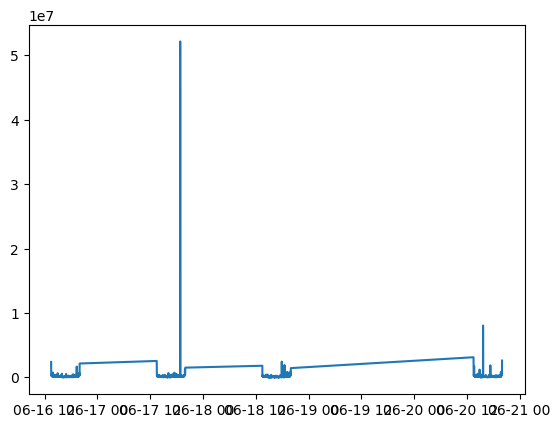

In [76]:

plt.plot(spy['Volume'])
print(spy.dtypes)
print(spy.isna().sum())
spy['Daily Return'] = (spy['Close'] - spy['Open']) / spy['Open']
spy['Daily Return'].corr(spy['Volume'])


In [78]:
fast_ma = spy['Close'].rolling(10).mean()
slow_ma = spy['Close'].rolling(30).mean()
spy['signal'] = np.where(fast_ma > slow_ma, 1 , 0)
spy['signal']

Datetime
2025-06-16 13:30:00+00:00    0
2025-06-16 13:31:00+00:00    0
2025-06-16 13:32:00+00:00    0
2025-06-16 13:33:00+00:00    0
2025-06-16 13:34:00+00:00    0
                            ..
2025-06-20 19:55:00+00:00    1
2025-06-20 19:56:00+00:00    1
2025-06-20 19:57:00+00:00    1
2025-06-20 19:58:00+00:00    1
2025-06-20 19:59:00+00:00    1
Name: signal, Length: 1543, dtype: int32

spy['return'] = np.log(spy['Close']).shift(-1)
spy['strategy return'] = spy['signal'] * spy['return'] 
r = spy['strategy_return']

In [55]:
import statsmodels.api as sm

x = spy['Volume']
y = spy['Daily Return']

X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Daily Return   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     13.33
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           0.000263
Time:                        16:14:54   Log-Likelihood:                 26264.
No. Observations:                8154   AIC:                        -5.252e+04
Df Residuals:                    8152   BIC:                        -5.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.959      0.0